In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from descartes import PolygonPatch
#Direct input 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
path="/home/alguero/Work/smodelsv2-paper/IDM-Scoto/scalar_DM_scenario/plots"
df = pd.read_csv("scalarDataFermions.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax', ascending=True)
df

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
9558,499.4427,386.3139,385.8176,0.4963,0.004635,0.000003,ATLAS-SUSY-2016-06,3.617189e-07,ATLAS-SUSY-2016-32,0.000003,3.617189e-07,"TDTM1F, TDTM2F",TDTM1F,True,idm-batch2-pt-4206.slha
2555,402.8527,377.3270,376.8308,0.4962,0.004637,0.000003,ATLAS-SUSY-2016-06,3.454690e-07,ATLAS-SUSY-2016-32,0.000003,3.454690e-07,"TDTM1F, TDTM2F",TDTM1F,True,idm-batch2-pt-3199.slha
10704,456.0158,390.7605,390.2674,0.4931,0.004730,0.000003,ATLAS-SUSY-2016-06,4.148812e-07,ATLAS-SUSY-2016-32,0.000003,4.148812e-07,"TDTM1F, TDTM2F",TDTM1F,True,idm-batch2-pt-45.slha
20792,443.2197,374.8294,374.3386,0.4908,0.004797,0.000004,ATLAS-SUSY-2016-06,6.430207e-07,CMS-SUS-16-033,0.000004,2.998199e-07,"TDTM1F, TDTM2F",TDTM1F,True,idm-batch2-pt-564.slha
10257,390.6307,363.9185,363.4252,0.4933,0.004724,0.000005,ATLAS-SUSY-2016-06,2.816601e-07,CMS-EXO-19-010,0.000005,2.034610e-07,"TDTM1F, TDTM2F",TDTM1F,True,idm-batch2-pt-65.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,182.7784,179.8040,179.7440,0.0600,1747.248351,85.874400,ATLAS-SUSY-2016-32,3.773128e+01,CMS-EXO-13-006,0.000000,8.587440e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3411.slha
19059,177.3467,173.1297,173.0513,0.0784,459.153336,87.611960,ATLAS-SUSY-2016-32,3.344831e+01,CMS-EXO-13-006,0.000000,8.761196e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3147.slha
8070,176.4480,173.6519,173.5733,0.0786,455.120679,88.075270,ATLAS-SUSY-2016-32,3.655520e+01,CMS-EXO-13-006,0.000000,8.807527e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-4518.slha
6463,177.2137,173.7134,173.6534,0.0600,1747.276200,88.880680,ATLAS-SUSY-2016-32,3.885162e+01,CMS-EXO-13-006,0.000000,8.888068e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-1838.slha


In [2]:
excl = df[df['rmax'] > 1]
compressed = excl[excl['mA0']-excl['mHc']<5]
df = df[df['mA0']-df['mHc']>5]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = df[df['rmaxDT']>1]
hscp = df[df['rmaxHSCP']>1]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
excl

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
23688,724.7218,556.2703,556.1891,0.0812,385.451838,1.000428,ATLAS-SUSY-2016-32,0.987301,ATLAS-SUSY-2016-32,0.000000,1.000428,"THSCPM10, THSCPM1b, THSCPM3",THSCPM1b,False,idm-batch3-pt-1760.slha
6328,504.2976,439.4582,439.3186,0.1396,11.432602,1.000459,CMS-EXO-13-006,0.507490,ATLAS-SUSY-2016-32,0.074552,1.000459,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b,True,idm-batch7-pt-2498.slha
4265,498.6136,491.0672,490.9277,0.1395,24.859712,1.000480,ATLAS-SUSY-2016-32,0.943637,CMS-EXO-13-006,0.032630,1.000480,"THSCPM11, THSCPM1b",THSCPM1b,False,idm-batch10-pt-479.slha
4367,477.0613,377.2102,377.0705,0.1397,5.897102,1.000500,CMS-EXO-13-006,0.215286,CMS-PAS-EXO-16-036,0.213470,1.000500,"THSCPM1b, THSCPM2b, THSCPM3, THSCPM4",THSCPM2b,True,idm-batch7-pt-671.slha
26552,475.2929,387.8319,387.6927,0.1392,6.472079,1.000941,CMS-EXO-13-006,0.240226,CMS-PAS-EXO-16-036,0.182563,1.000941,"THSCPM1b, THSCPM2b, THSCPM3, THSCPM4",THSCPM2b,False,idm-batch9-pt-2482.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,182.7784,179.8040,179.7440,0.0600,1747.248351,85.874400,ATLAS-SUSY-2016-32,37.731280,CMS-EXO-13-006,0.000000,85.874400,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3411.slha
19059,177.3467,173.1297,173.0513,0.0784,459.153336,87.611960,ATLAS-SUSY-2016-32,33.448310,CMS-EXO-13-006,0.000000,87.611960,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3147.slha
8070,176.4480,173.6519,173.5733,0.0786,455.120679,88.075270,ATLAS-SUSY-2016-32,36.555200,CMS-EXO-13-006,0.000000,88.075270,THSCPM1b,THSCPM1b,False,idm-batch2-pt-4518.slha
6463,177.2137,173.7134,173.6534,0.0600,1747.276200,88.880680,ATLAS-SUSY-2016-32,38.851620,CMS-EXO-13-006,0.000000,88.880680,THSCPM1b,THSCPM1b,False,idm-batch2-pt-1838.slha


In [3]:
tot = df.shape[0]
for ana in analyses:
    part = df[df['ana'] == ana].shape[0]
    percent = part/tot
    print(ana, percent*100)

ATLAS-SUSY-2016-32 28.80479661077801
CMS-EXO-13-006 28.711449395038237
CMS-EXO-19-010 27.357914766811476
ATLAS-SUSY-2016-06 15.125839227372277


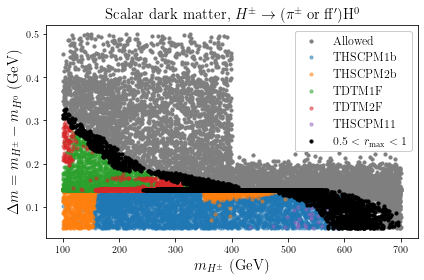

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed", s=10)
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label, s=10, alpha=0.5)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0$",fontsize = 15)
plt.ylabel(r'$\Delta m = m_{H^\pm} - m_{H^0}$ (GeV)',fontsize = 15)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

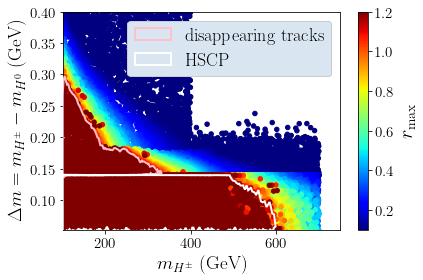

In [5]:
fig, ax = plt.subplots()
ax = plt.gca()
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=20)
plt.scatter(compressed['mHc'],compressed['deltaM'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=20)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=20)
cb.ax.tick_params(labelsize=15) 
ax.tick_params(axis='both', labelsize=15)

###Disappearing tracks
frame_analysis2d=dt[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=2,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='DT fermions excl.'))

        
####HSCP
frame_analysis2d=hscp[['mHc','deltaM']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP'))

lgd = plt.legend(loc='upper right',fontsize=18, facecolor='#d9e6f2', framealpha = 1.), 

# plt.text(200, 0.1, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.2), xytext=(405, 0.35), s="disappearing tracks\nexclusion", color='black', fontsize=15, 
#              arrowprops={'arrowstyle':'->'}, ha='left', va='center')

plt.ylim(0.053,0.4)
plt.xlim(101,750)
# plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\Delta m = m_{H^\pm} - m_{H^0}$ (GeV)',fontsize = 19)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 19)
plt.tight_layout()
file = os.path.join(path, "fermionDeltaM.png")
plt.savefig(file)
plt.show()

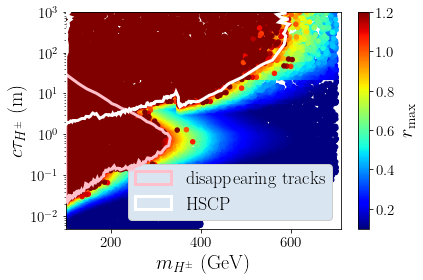

In [6]:
fig, ax = plt.subplots()
ax = plt.gca()
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=20)
plt.scatter(compressed['mHc'],compressed['dHc'],c=compressed['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=20)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=20)
cb.ax.tick_params(labelsize=15) 
ax.tick_params(axis='both', labelsize=15)

####Disappearing tracks
frame_analysis2d=dt[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='pink',fill=False,zorder=20,lw=3,label='disappearing tracks'))

####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='dis. tracks fermions eff.'))
        
####HSCP
frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
# Function for varying the alpha parameter
def alf(ind, r):
    if any(frame_analysis2d[ind][:,0] < 200) and any(frame_analysis2d[ind][:,1] < 7):
        return .05
#     elif any(frame_analysis2d[ind][:,0] < 280) and any(frame_analysis2d[ind][:,1] < 10):
#         return .0002
    elif any(frame_analysis2d[ind][:,0] < 380) and any(frame_analysis2d[ind][:,1] < 10):
        return .3
    else:
        return .008                
                
alpha_shape = alphashape.alphashape(frame_analysis2d, alf)
ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=3,label='HSCP'))

lgd = plt.legend(loc='lower right', fontsize=18, facecolor='#d9e6f2', framealpha = 1.)

# plt.text(175, 100, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
# plt.annotate(xy=(150, 0.1), xytext=(300, 0.7), s="disappearing tracks\nexclusion", color='white', fontsize=15, 
#              arrowprops={'arrowstyle':'->', 'color':'white'}, ha='left', va='center')

plt.ylim(5e-3,1e3)
plt.xlim(101,710)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 25)
plt.ylabel(r'$c\tau_{H^\pm}$ (m)',fontsize = 20)
plt.xlabel(r'$m_{H^\pm}$ (GeV)',fontsize = 20)
plt.tight_layout()
file = os.path.join(path, "fermionWidth.png")
plt.savefig(file)
plt.show()

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed", s=10)
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label, alpha=0.5, s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

RuntimeError: latex was not able to process the following string:
b'$\\\\mathregular{m_{H^\\\\pm}}$ (GeV)'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/alguero/.cache/matplotlib/tex.cache/64e4f71e13eaa77f3dbdba3b72dfcb47.tex
LaTeX2e <2018-12-01>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 64e4f71e13eaa77f3dbdba3b72dfcb47.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \mathregular 
                             
l.19 {\rmfamily $\mathregular
                             {m_{H^\pm}}$ (GeV)}
No pages of output.
Transcript written on 64e4f71e13eaa77f3dbdba3b72dfcb47.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\mathregular{m_{H^\\\\pm}}$ (GeV)'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/alguero/.cache/matplotlib/tex.cache/64e4f71e13eaa77f3dbdba3b72dfcb47.tex
LaTeX2e <2018-12-01>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2018/09/03 v1.4i Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
No file 64e4f71e13eaa77f3dbdba3b72dfcb47.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \mathregular 
                             
l.19 {\rmfamily $\mathregular
                             {m_{H^\pm}}$ (GeV)}
No pages of output.
Transcript written on 64e4f71e13eaa77f3dbdba3b72dfcb47.log.




<Figure size 432x288 with 1 Axes>

In [ ]:
plt.figure(figsize=(6,4))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to \pi^\pm H^0$", s=10)
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to l\bar{\nu}_l H^0$", s=10)



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "hpWidth.png")
plt.savefig(file)
plt.show()